In [1]:
from hangar import make_torch_dataset
from hangar import Repository
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import torch
from torch.utils.data import DataLoader

In [3]:
repo = Repository('~/jjmachan/hangar_examples/mnist')

In [4]:
co = repo.checkout()
co


 Neither BRANCH or COMMIT specified.
 * Checking out writing HEAD BRANCH: master


Hangar ReaderCheckout                
    Writer       : False                
    Commit Hash  : a=3f4c4497c93982d0d182110277841ed37d1bbf8e                
    Num Arraysets : 6                
    Num Metadata : 0


In [5]:
repo.summary()

Summary of Contents Contained in Data Repository 
 
| Repository Info 
|----------------- 
|  Base Directory: /home/jjmachan/jjmachan/hangar_examples/mnist 
|  Disk Usage: 105.83 MB 
 
| Commit Details 
------------------- 
|  Commit: a=3f4c4497c93982d0d182110277841ed37d1bbf8e 
|  Created: Tue Feb  4 14:31:07 2020 
|  By: jjmachan 
|  Email: jjmachan@g.com 
|  Message: added all the mnist datasets 
 
| DataSets 
|----------------- 
|  Number of Named Arraysets: 6 
|
|  * Arrayset Name: mnist_test_images 
|    Num Arrays: 10000 
|    Details: 
|    - schema_hash: 1=bfae2898eddd 
|    - schema_dtype: 11 
|    - schema_is_var: False 
|    - schema_max_shape: (784,) 
|    - schema_is_named: True 
|    - schema_default_backend: 00 
|    - schema_default_backend_opts: {'shuffle': 'byte', 'complib': 'lzf', 'complevel': None} 
|
|  * Arrayset Name: mnist_test_labels 
|    Num Arrays: 10000 
|    Details: 
|    - schema_hash: 1=27c2ed219ffa 
|    - schema_dtype: 7 
|    - schema_is_var: False 


In [6]:
repo.log()

* a=3f4c4497c93982d0d182110277841ed37d1bbf8e (master) : added all the mnist datasets


In [7]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title.item(), fontsize=80)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

/home/jjmachan/jjmachan/hangar-py/src/hangar/dataloaders/torchloader.py:70: UserWarning: Dataloaders are experimental in the current release.
  warnings.warn("Dataloaders are experimental in the current release.", UserWarning)


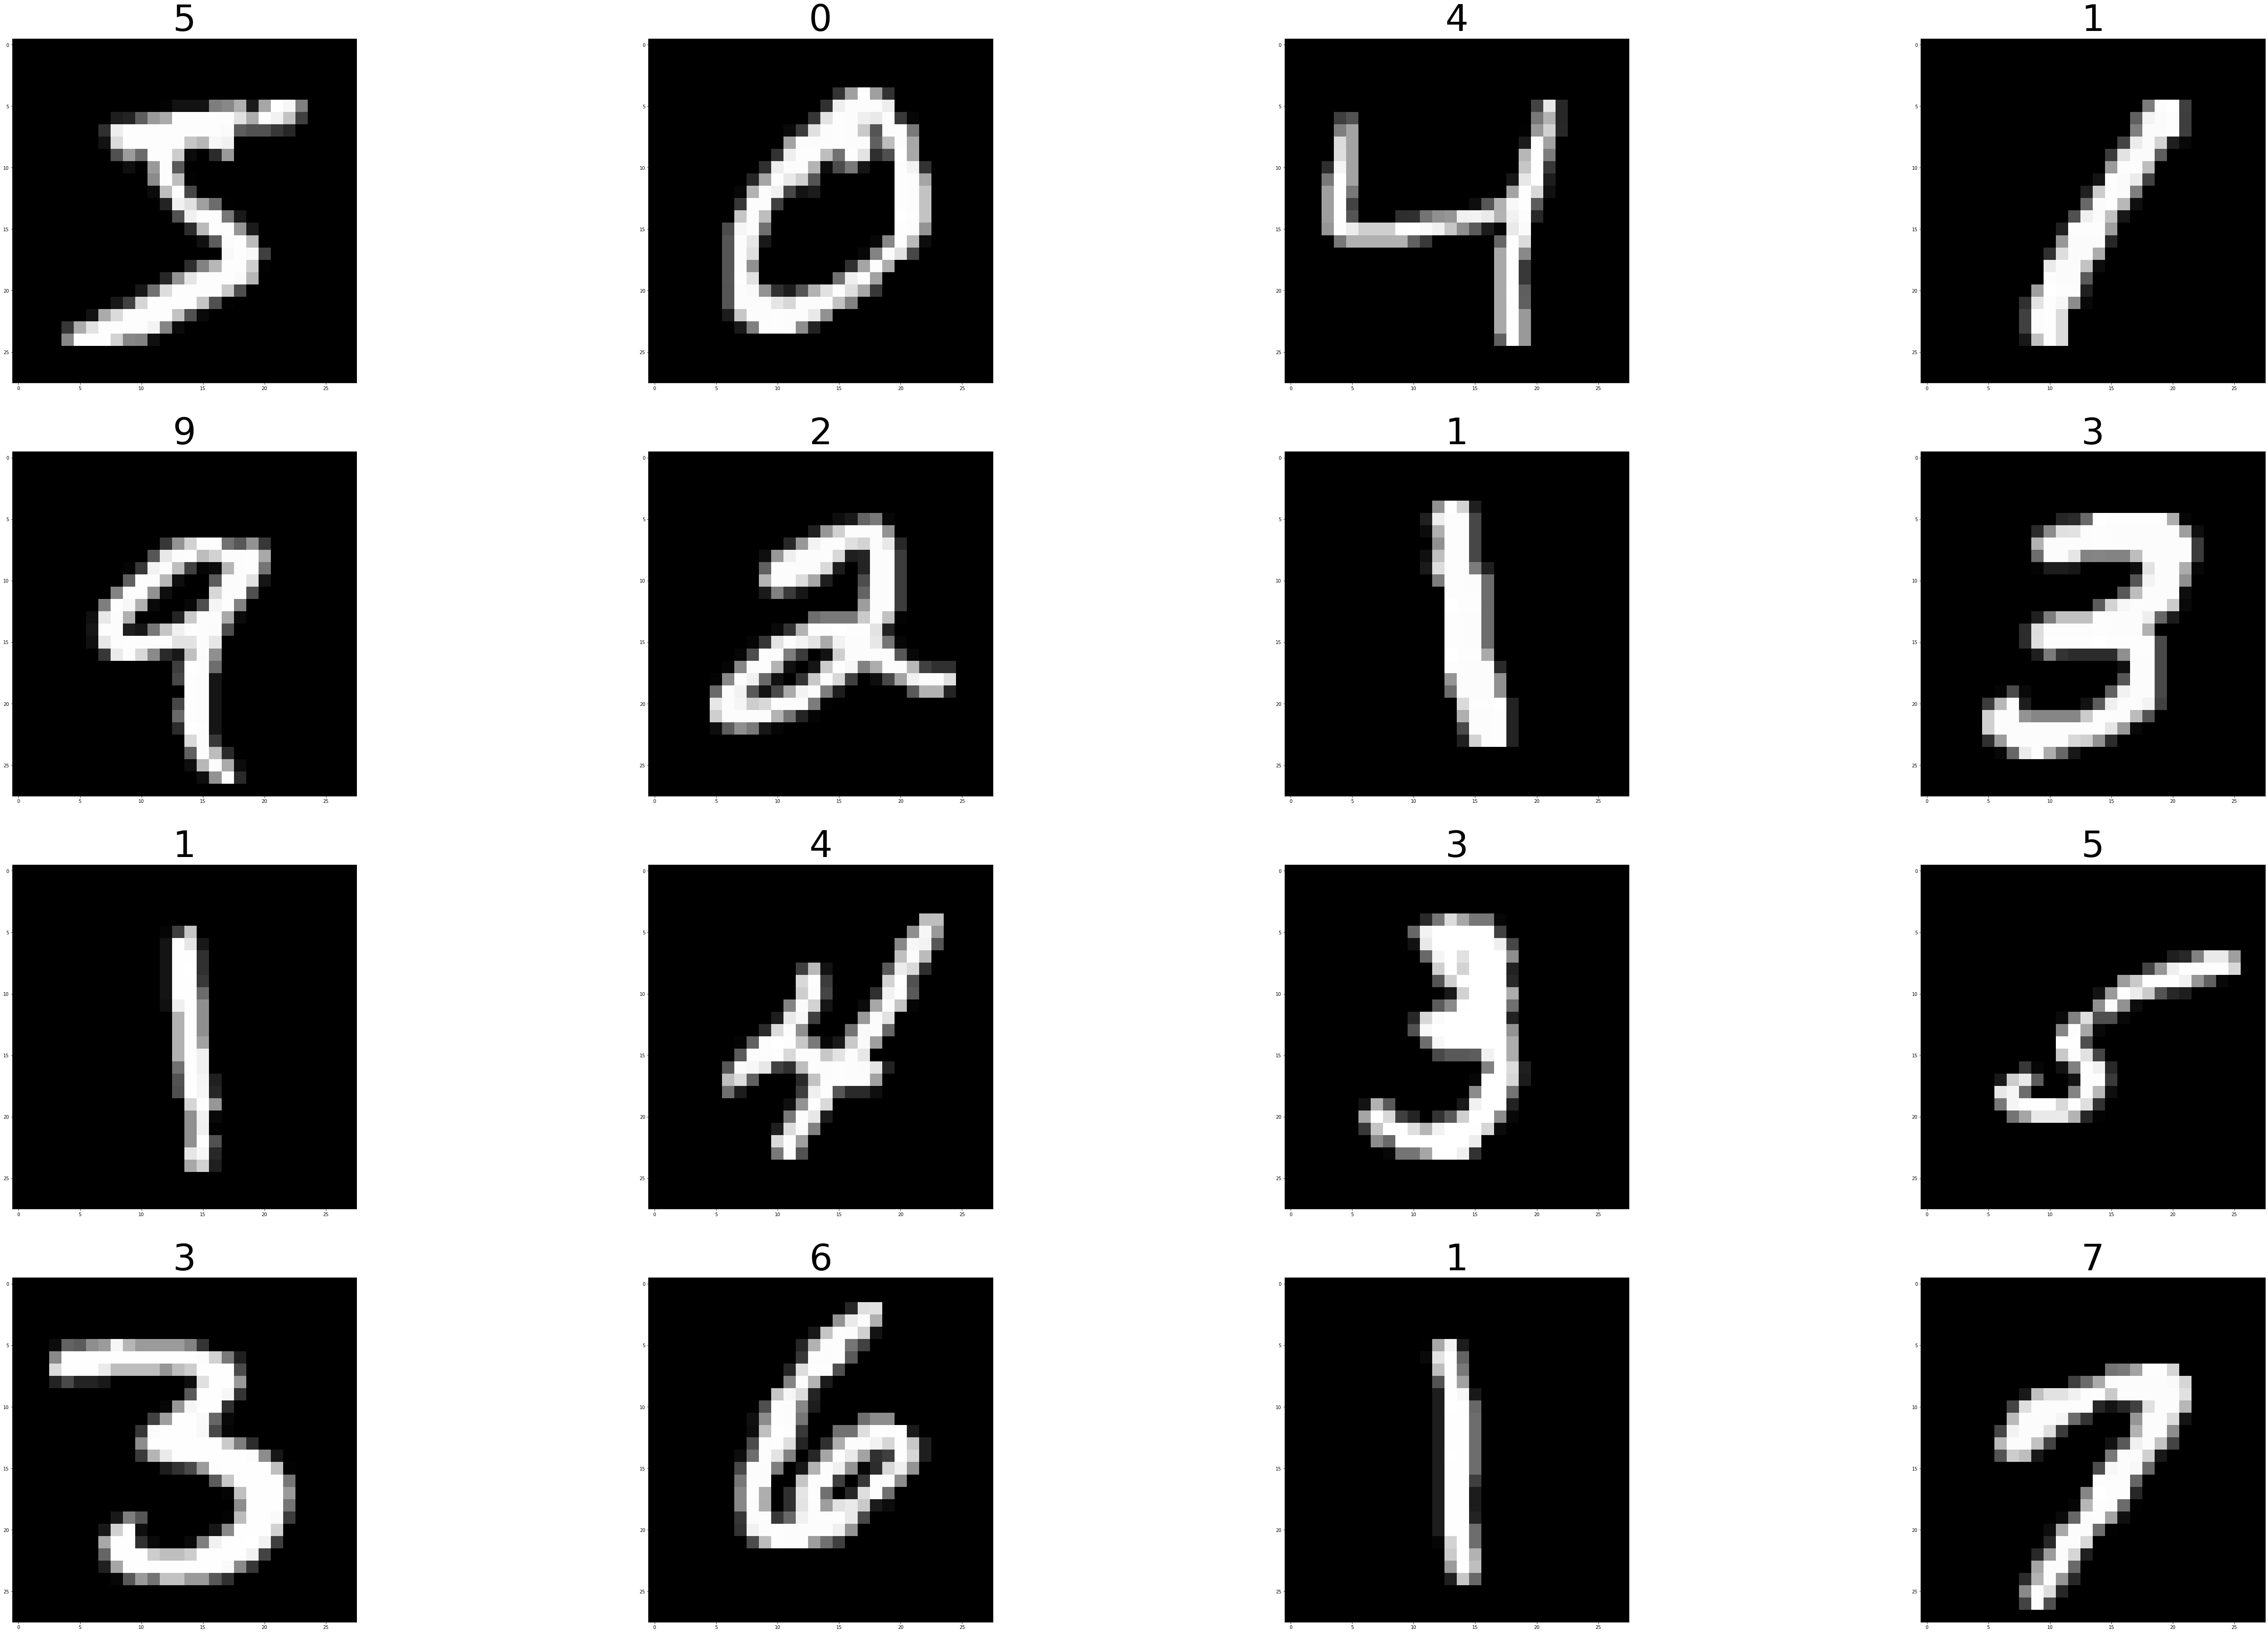

In [8]:
train_imgs = co.arraysets['mnist_training_images']
train_labels = co.arraysets['mnist_training_labels']

datasets = make_torch_dataset([train_imgs, train_labels])
loader = DataLoader(datasets, batch_size=16)
for data in loader:
    #print(image.reshape(16,28,28))
    show_images(data[0].reshape(16,28,28), cols=4, titles=data[1])
    break


## Train a model 

In [9]:
import torch.nn as nn
import torch.nn.functional as F

In [10]:
# define the neural network

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        
#         self.conv1 = nn.Conv2d(1, 6, 3)
#         self.conv2 = nn.Conv2d(6, 16, 3)
        
        self.fc1 = nn.Linear(784, 120)
        self.fc2 = nn.Linear(120, 80)
        self.fc3 = nn.Linear(80, 10)
        
    def forward(self, x):
#         x = F.max_pool2d(F.relu(self.conv1(x)), 2)
#         x = F.max_pool2d(F.relu(self.conv2(x)), 2)
#         x = x.view(-1, 5*5*16)
    
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.log_softmax(x)
        return x

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=80, bias=True)
  (fc3): Linear(in_features=80, out_features=10, bias=True)
)


In [11]:
input_img = torch.ones(1,1,784)
input_img.shape

torch.Size([1, 1, 784])

In [12]:
output = net(input_img)

/home/jjmachan/miniconda3/envs/hangar-dev/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [13]:
output.shape

target = torch.ones(1, dtype=torch.long)

In [14]:
loss

NameError: name 'loss' is not defined

## Training loop

In [15]:
train_imgs = co.arraysets['mnist_training_images']
train_labels = co.arraysets['mnist_training_labels']

datasets = make_torch_dataset([train_imgs, train_labels])
loader = DataLoader(datasets, batch_size=16)

optimizer = optim.SGD(net.parameters(), lr=0.005)

epochs = 5

for epoch in range(epochs):
    for i, data in enumerate(loader):
        optimizer.zero_grad()
        output = net(data[0])
        loss = F.nll_loss(output, data[1].view(-1))

        if i%100 == 0:
            print('epoch: ',epoch ,'iteration', i, loss.item())
        loss.backward()
        optimizer.step()

NameError: name 'optim' is not defined

In [38]:
# Testing

test_imgs = co.arraysets['mnist_test_images']
test_labels = co.arraysets['mnist_test_labels']

datasets = make_torch_dataset([test_imgs, test_labels])
loader = DataLoader(datasets, batch_size=16)

net.eval()
correct = 0
for i, data in enumerate(loader):
    with torch.no_grad():
        output = net(data[0])
        predict = output.argmax(dim=1, keepdims=True)
        correct += predict.eq(data[1]).sum()
        
        
print(correct)
print(correct.item()/(len(loader)*16))

/home/jjmachan/miniconda3/envs/hangar-dev/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


tensor(9346)
0.9346
